<a href="https://colab.research.google.com/github/Danangadh/ML-A11.2023.15331-UAS/blob/main/ML_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dokumentasi Proyek Machine Learning: Analisis Risiko Mahasiswa

**Disusun Oleh:**

*   Nama  : Danang Ade Hidayat
*   NIM   : A11.2023.15331
*   Prodi : Teknik Informatika
* UNIVERSITAS DIAN NUSWANTORO


## 1. Ringkasan dan Permasalahan Proyek

**Ringkasan:**

Proyek ini bertujuan untuk menganalisis faktor-faktor yang mempengaruhi tingkat risiko akademik mahasiswa dan membangun model Machine Learning untuk memprediksi tingkat risiko tersebut (High, Medium, Low). Dengan mengidentifikasi mahasiswa yang berisiko tinggi, institusi dapat mengambil tindakan pencegahan yang tepat waktu untuk membantu mahasiswa tersebut mencapai keberhasilan akademik.

**Permasalahan:**

Institusi pendidikan seringkali menghadapi tantangan dalam mengidentifikasi mahasiswa yang berpotensi mengalami kesulitan akademis atau putus studi. Kurangnya sistem deteksi dini dapat mengakibatkan intervensi yang terlambat, berdampak negatif pada performa mahasiswa dan tingkat retensi institusi.

**Tujuan:**

*   Memahami karakteristik mahasiswa yang terkait dengan tingkat risiko akademik.
*   Membangun model klasifikasi yang akurat untuk memprediksi tingkat risiko mahasiswa.
*   Menyediakan alat bagi institusi untuk mengidentifikasi mahasiswa berisiko tinggi dan merancang program intervensi yang efektif.

**Model / Alur Penyelesaian:**


ini adalah bagan alur penyelesaian proyek ini:
```mermaid
graph TD
    A[Data Loading] --> B(Data Cleaning & Preprocessing)
    B --> C(Exploratory Data Analysis - EDA)
    C --> D(Feature Engineering)
    D --> E(Data Splitting - Train/Test)
    E --> F(Model Training - Random Forest)
    F --> G(Model Evaluation)
    G --> H(Interpretation & Conclusion)
  

In [29]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [28]:
import pandas as pd

# Path ke file di Google Drive
file_path = "/content/drive/My Drive/contentml/college_student_management_data.csv"

# Baca file CSV
df = pd.read_csv(file_path)

## 2. Penjelasan Dataset, EDA dan Proses Features Dataset

**Penjelasan Dataset:**

Dataset yang digunakan dalam proyek ini adalah `college_student_management_data.csv`. Dataset ini berisi informasi mengenai berbagai atribut mahasiswa, termasuk demografi, performa akademik, dan interaksi dengan Learning Management System (LMS). Kolom-kolom utama dalam dataset meliputi:

*   `student_id`: ID unik mahasiswa.
*   `age`: Usia mahasiswa.
*   `gender`: Jenis kelamin mahasiswa.
*   `major`: Jurusan mahasiswa.
*   `GPA`: Indeks Prestasi Kumulatif mahasiswa.
*   `course_load`: Jumlah mata kuliah yang diambil.
*   `avg_course_grade`: Rata-rata nilai mata kuliah.
*   `attendance_rate`: Tingkat kehadiran.
*   `enrollment_status`: Status pendaftaran (Aktif, Lulus, Cuti).
*   `lms_logins_past_month`: Jumlah login ke LMS dalam sebulan terakhir.
*   `avg_session_duration_minutes`: Durasi rata-rata sesi di LMS dalam menit.
*   `assignment_submission_rate`: Tingkat pengiriman tugas.
*   `forum_participation_count`: Jumlah partisipasi di forum diskusi.
*   `video_completion_rate`: Tingkat penyelesaian video pembelajaran.
*   `risk_level`: Tingkat risiko akademik (target variable: High, Medium, Low).

**EDA (Exploratory Data Analysis):**

Tahap EDA dilakukan untuk memahami karakteristik data, mengidentifikasi pola, dan mendeteksi potensi masalah seperti nilai yang hilang atau outlier. Beberapa visualisasi dan analisis yang dilakukan meliputi:

*   Pemeriksaan dimensi dataset (`df.shape`).
*   Menampilkan beberapa baris pertama dataset (`df.head()`).
*   Melihat informasi dataset untuk tipe data dan nilai non-null (`df.info()`).
*   Statistik deskriptif untuk kolom numerik (`df.describe()`).
*   Pemeriksaan nilai yang hilang (`df.isnull().sum()`).
*   Visualisasi distribusi fitur-fitur kunci (histogram, box plot).
*   Analisis korelasi antar fitur numerik (heatmap, pair plot).
*   Analisis hubungan antara fitur kategorikal dan target (contoh: rata-rata GPA berdasarkan jurusan).

**Proses Features Dataset:**

Sebelum membangun model, beberapa langkah preprocessing dilakukan:

*   **Penanganan Nilai yang Hilang:** Dalam kasus ini, dataset tidak memiliki nilai yang hilang. Jika ada, strategi pengisian nilai (imputasi) akan diterapkan (misalnya, menggunakan median untuk numerik, placeholder untuk kategorikal).
*   **Encoding Variabel Kategorikal:** Variabel kategorikal seperti `gender`, `major`, dan `enrollment_status` perlu diubah menjadi format numerik agar dapat diproses oleh model. Dalam proyek ini, `LabelEncoder` digunakan untuk mengubah variabel target `risk_level` menjadi format numerik, dan akan diterapkan juga pada fitur kategorikal lainnya sebelum pelatihan model.
*   **Pemilihan Fitur:** Kolom yang tidak relevan atau merupakan ID (`student_id`, `risk_level` asli) dihapus dari dataset fitur.

# Data Exploration

In [18]:
# Print the shape of the dataset
print('Dataset shape:', df.shape)

# Display the first few rows
print('First 5 rows of the dataset:')
display(df.head())

# Display dataset info to check datatypes and non-null values
print('Dataset info:')
df.info()

# If numeric summary is needed
display(df.describe())

Dataset shape: (1545, 15)
First 5 rows of the dataset:


student_id  age gender             major   GPA  course_load  \
0       S001   24  Other  Computer Science  2.42            5   
1       S002   21   Male              Arts  3.73            6   
2       S003   22   Male  Computer Science  2.80            3   
3       S004   24   Male              Arts  2.59            4   
4       S005   20  Other  Computer Science  2.30            4   

   avg_course_grade  attendance_rate enrollment_status  lms_logins_past_month  \
0              67.2             0.71         Graduated                     32   
1              64.4             0.84             Leave                     29   
2              95.3             0.89         Graduated                     34   
3              73.7             0.98         Graduated                     22   
4              87.4             0.95            Active                      9   

   avg_session_duration_minutes  assignment_submission_rate  \
0                            33                        0.70   
1                            53                        0.91   
2                            69                        0.58   
3                            18                        0.91   
4                            11                        0.77   

   forum_participation_count  video_completion_rate risk_level  
0                          8                   0.74       High  
1                         13                   0.85     Medium  
2                         18                   0.99     Medium  
3                          6                   0.72     Medium  
4                         15                   0.76       High

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    1545 non-null   object 
 1   age                           1545 non-null   int64  
 2   gender                        1545 non-null   object 
 3   major                         1545 non-null   object 
 4   GPA                           1545 non-null   float64
 5   course_load                   1545 non-null   int64  
 6   avg_course_grade              1545 non-null   float64
 7   attendance_rate               1545 non-null   float64
 8   enrollment_status             1545 non-null   object 
 9   lms_logins_past_month         1545 non-null   int64  
 10  avg_session_duration_minutes  1545 non-null   int64  
 11  assignment_submission_rate    1545 non-null   float64
 12  forum_participation_count     1545 non-null   in

age          GPA  course_load  avg_course_grade  \
count  1545.000000  1545.000000  1545.000000       1545.000000   
mean     21.482848     3.012324     4.487379         79.914887   
std       2.300287     0.571395     1.098163         11.528625   
min      18.000000     2.000000     3.000000         60.000000   
25%      19.000000     2.520000     4.000000         69.900000   
50%      22.000000     3.030000     5.000000         79.600000   
75%      23.000000     3.510000     5.000000         89.700000   
max      25.000000     4.000000     6.000000        100.000000   

       attendance_rate  lms_logins_past_month  avg_session_duration_minutes  \
count      1545.000000            1545.000000                   1545.000000   
mean          0.794460              19.344984                     49.365049   
std           0.115142              11.515003                     23.195192   
min           0.600000               0.000000                     10.000000   
25%           0.690000              10.000000                     29.000000   
50%           0.790000              19.000000                     49.000000   
75%           0.890000              29.000000                     70.000000   
max           1.000000              39.000000                     89.000000   

       assignment_submission_rate  forum_participation_count  \
count                 1545.000000                1545.000000   
mean                     0.752201                   9.642718   
std                      0.144351                   5.752493   
min                      0.500000                   0.000000   
25%                      0.630000                   5.000000   
50%                      0.760000                  10.000000   
75%                      0.880000                  15.000000   
max                      1.000000                  19.000000   

       video_completion_rate  
count            1545.000000  
mean                0.750958  
std                 0.144840  
min                 0.500000  
25%                 0.620000  
50%                 0.750000  
75%                 0.880000  
max                 1.000000

# Data Cleaning dan Preprocessing

In [19]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
display(missing_values)

# If missing values are found, here is an example strategy to fill or drop them
if missing_values.sum() > 0:
    # For numeric columns, you might fill missing values with median
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].median(), inplace=True)

    # For categorical columns, fill with a placeholder
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna('Unknown', inplace=True)
    print('Missing values were handled.')
else:
    print('No missing values detected.')


Missing values in each column:


student_id                      0
age                             0
gender                          0
major                           0
GPA                             0
course_load                     0
avg_course_grade                0
attendance_rate                 0
enrollment_status               0
lms_logins_past_month           0
avg_session_duration_minutes    0
assignment_submission_rate      0
forum_participation_count       0
video_completion_rate           0
risk_level                      0
dtype: int64

No missing values detected.


# Data Visualization

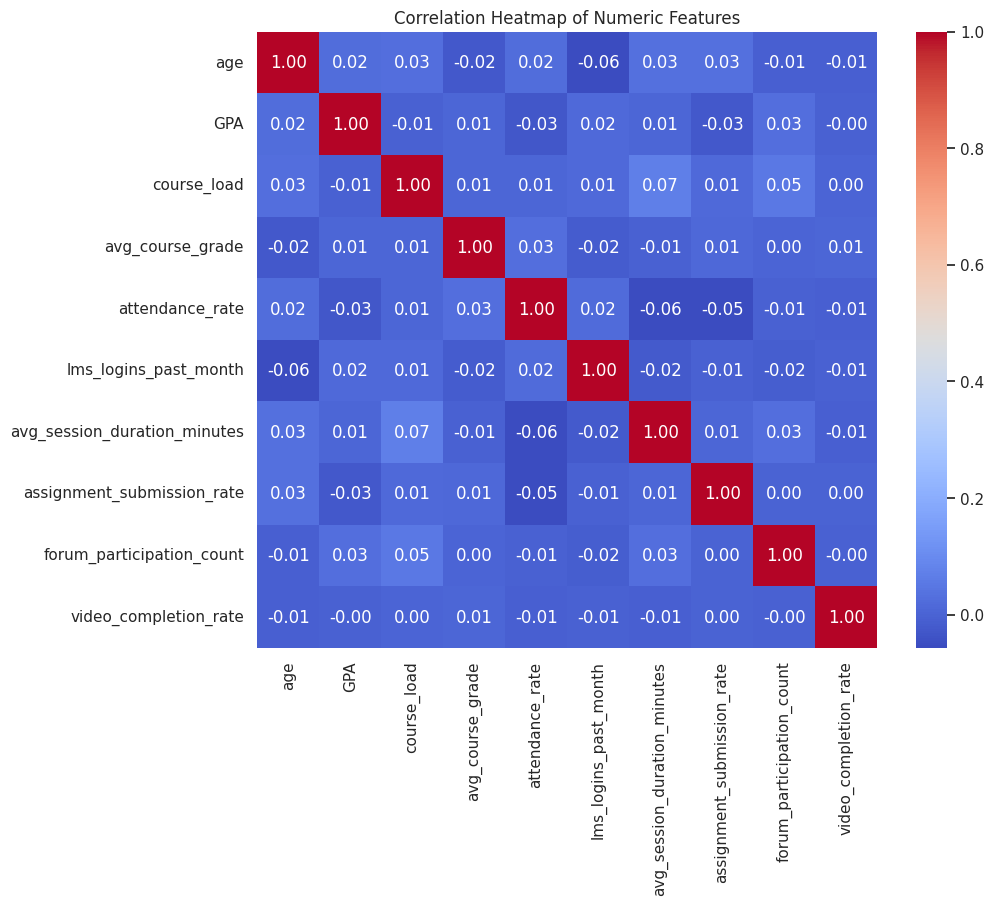

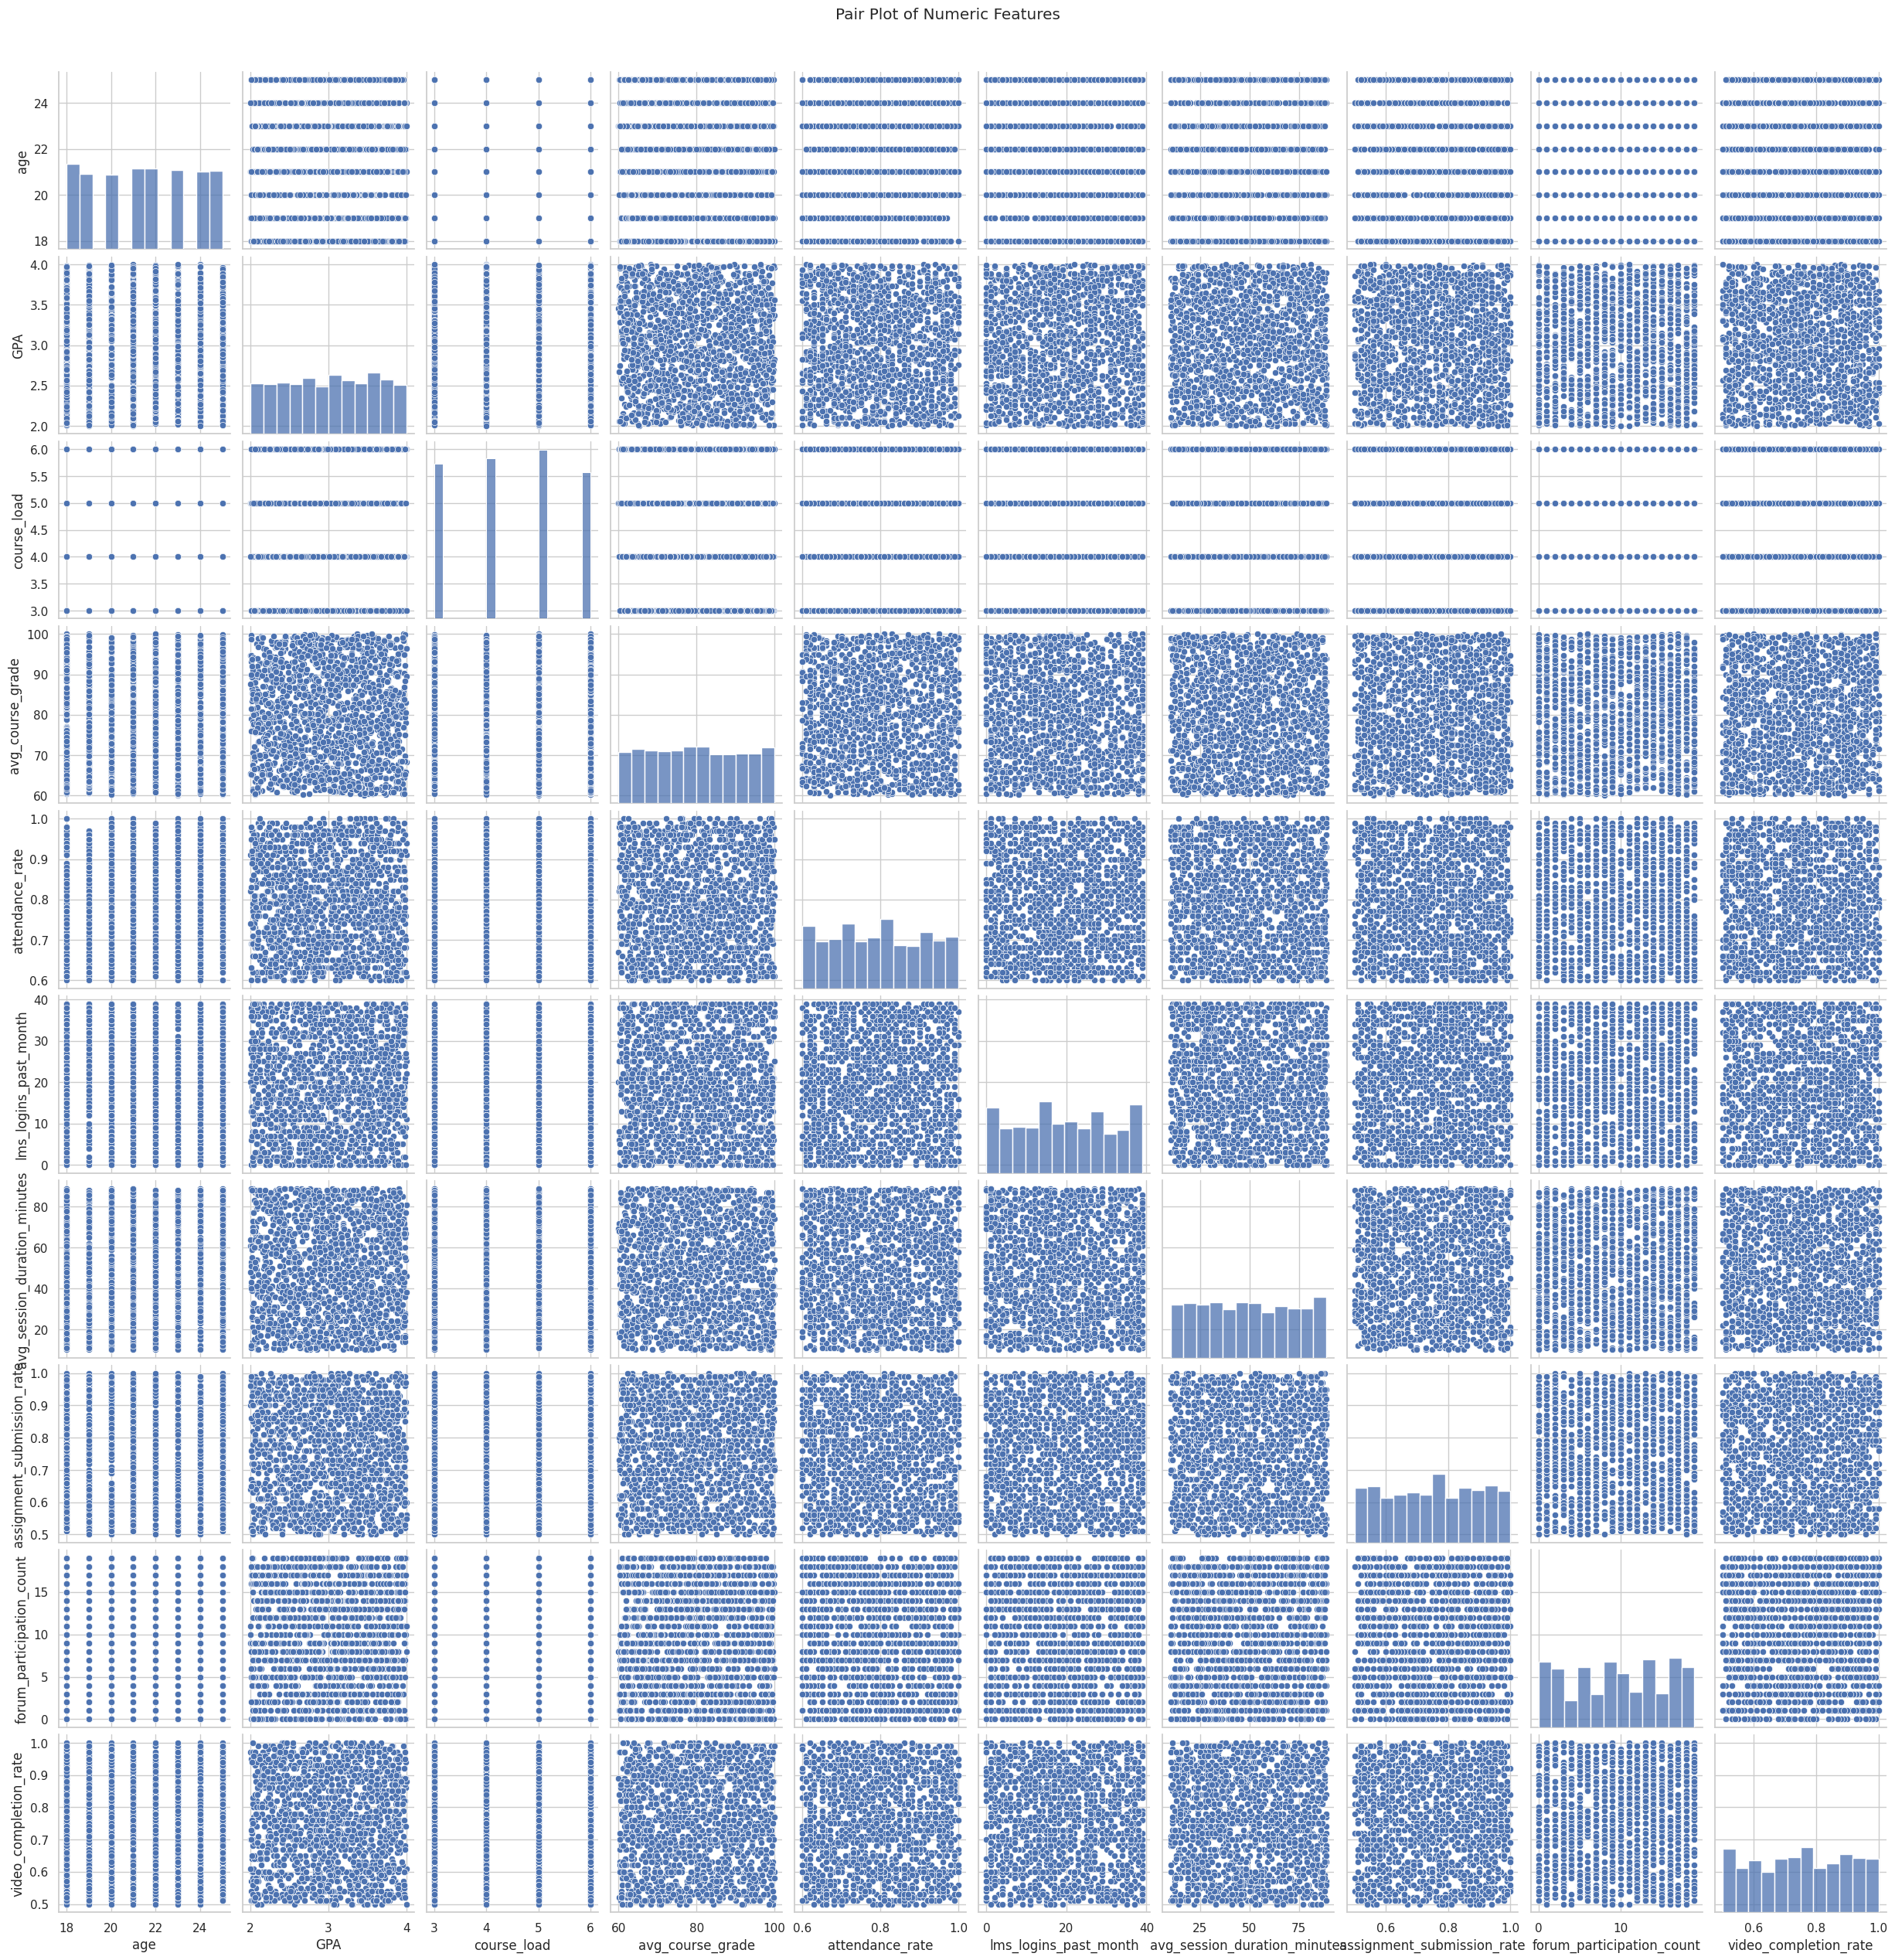

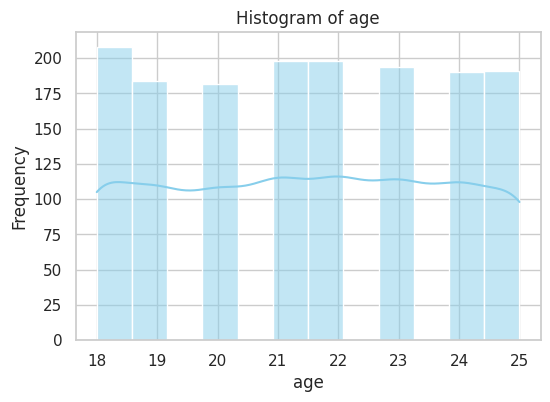

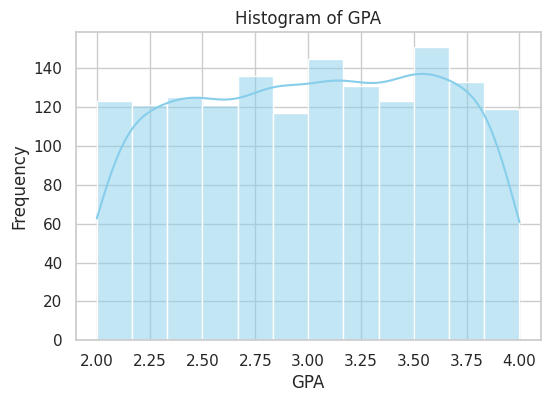

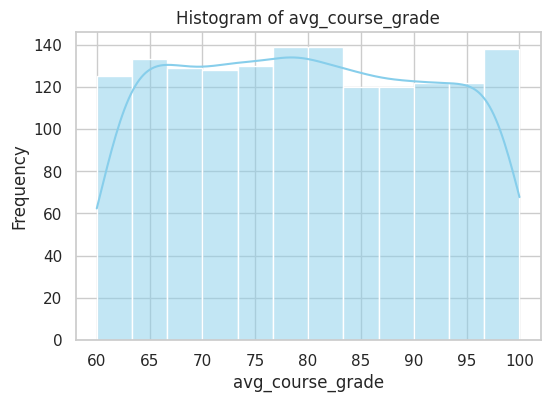

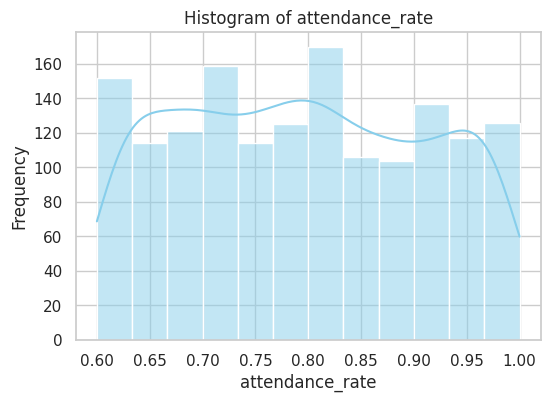

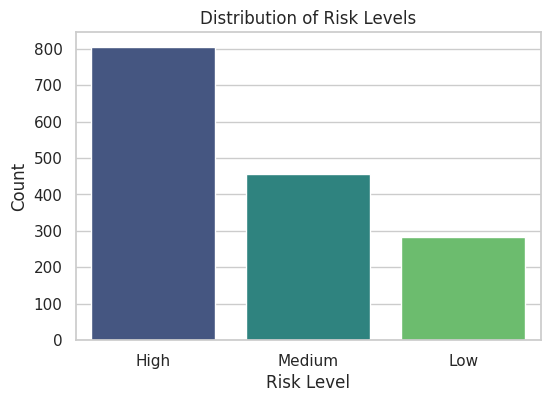

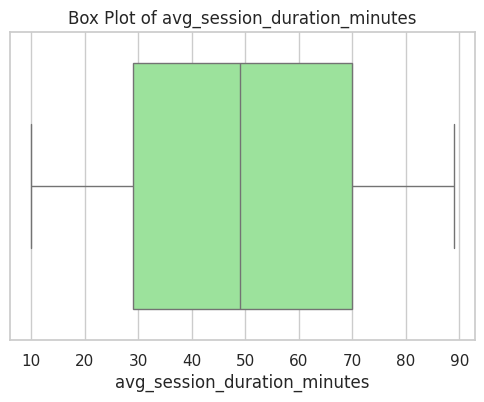

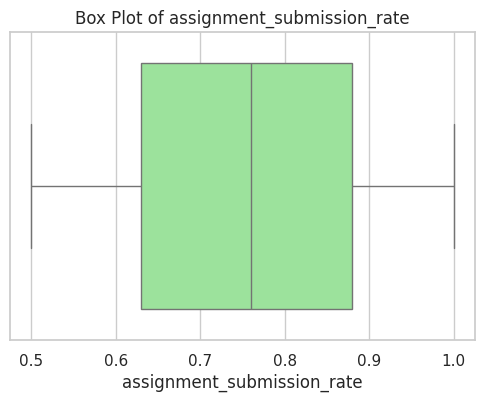

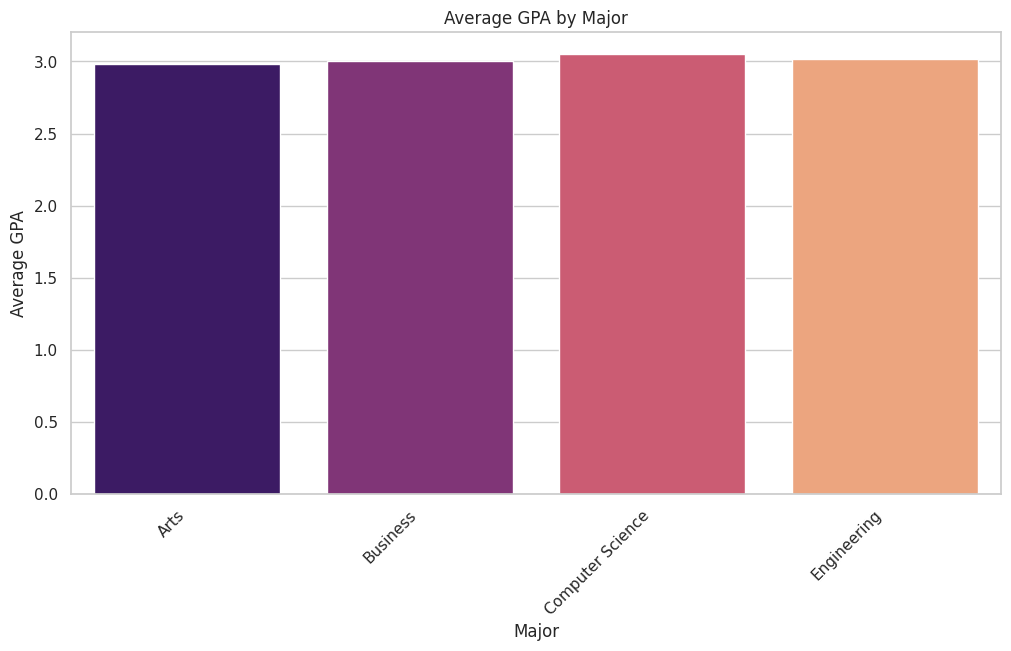

In [20]:
# 1. Heatmap of numeric feature correlations, if there are at least 4 numeric columns
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

# 2. Pair Plot of numeric features
if numeric_df.shape[1] > 1:
    sns.pairplot(numeric_df)
    plt.suptitle('Pair Plot of Numeric Features', y=1.02)
    plt.show()

# 3. Histogram distributions for key numeric columns
for col in ['age', 'GPA', 'avg_course_grade', 'attendance_rate']:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# 4. Count plot for categorical variable 'risk_level'
if 'risk_level' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='risk_level', data=df, palette='viridis')
    plt.title('Distribution of Risk Levels')
    plt.xlabel('Risk Level')
    plt.ylabel('Count')
    plt.show()

# 5. Box Plot for average session duration and assignment submission rate
for col in ['avg_session_duration_minutes', 'assignment_submission_rate']:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
        plt.show()

# 6. Grouped Barplot: Average GPA by major (if major column is present)
if 'major' in df.columns and 'GPA' in df.columns:
    plt.figure(figsize=(12, 6))
    avg_gpa_by_major = df.groupby('major')['GPA'].mean().reset_index()
    sns.barplot(x='major', y='GPA', data=avg_gpa_by_major, palette='magma')
    plt.title('Average GPA by Major')
    plt.xlabel('Major')
    plt.ylabel('Average GPA')
    plt.xticks(rotation=45, ha='right')
    plt.show()

## 3. Proses Learning / Modeling

**Pemilihan Model:**

Dalam proyek ini, model **Random Forest Classifier** dipilih. Random Forest adalah algoritma ensemble yang membangun banyak pohon keputusan dan menggabungkan prediksi mereka. Model ini dipilih karena kemampuannya menangani data dengan fitur yang beragam (numerik dan kategorikal setelah encoding), relatif robust terhadap overfitting, dan memberikan metrik kepentingan fitur.

**Langkah-langkah Pemodelan:**

1.  **Pembagian Data:** Dataset dibagi menjadi data pelatihan (training data) dan data pengujian (testing data) menggunakan fungsi `train_test_split`. Data pelatihan digunakan untuk melatih model, sedangkan data pengujian digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya. Proporsi pembagian yang umum adalah 80% untuk pelatihan dan 20% untuk pengujian (`test_size=0.2`).
2.  **Encoding Variabel Kategorikal (Fitur):** Variabel fitur yang masih bertipe 'object' (setelah penghapusan kolom ID dan target asli) diubah menjadi format numerik menggunakan `LabelEncoder`. Ini penting karena sebagian besar algoritma ML membutuhkan input numerik.
3.  **Inisialisasi dan Pelatihan Model:** Model `RandomForestClassifier` diinisialisasi dengan jumlah pohon (`n_estimators`) tertentu dan `random_state` untuk reproducibility. Model kemudian dilatih menggunakan data pelatihan (`X_train`, `y_train`).
4.  **Prediksi:** Setelah model dilatih, model digunakan untuk membuat prediksi pada data pengujian (`X_test`).

## 4. Performa Model

Performa model dievaluasi menggunakan metrik-metrik berikut pada data pengujian:

*   **Accuracy Score:** Mengukur proporsi prediksi yang benar secara keseluruhan.
*   **Confusion Matrix:** Tabel yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas (tingkat risiko).
*   **Classification Report:** Menyediakan metrik performa yang lebih rinci per kelas, termasuk Precision, Recall, dan F1-score.
*   **Permutation Importance:** (Opsional) Mengukur seberapa penting setiap fitur dalam mempengaruhi performa model dengan mengacak nilai fitur tersebut dan melihat penurunan akurasi.

# Predictive Modeling

Prediction Accuracy: 1.00


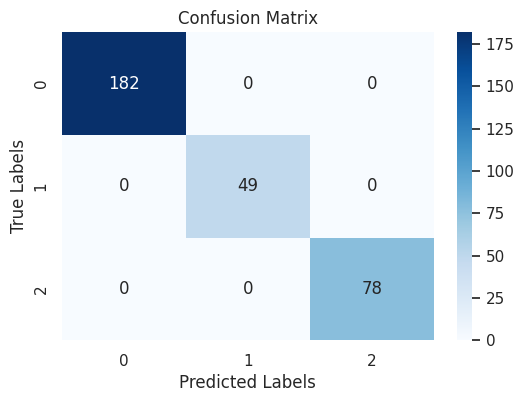

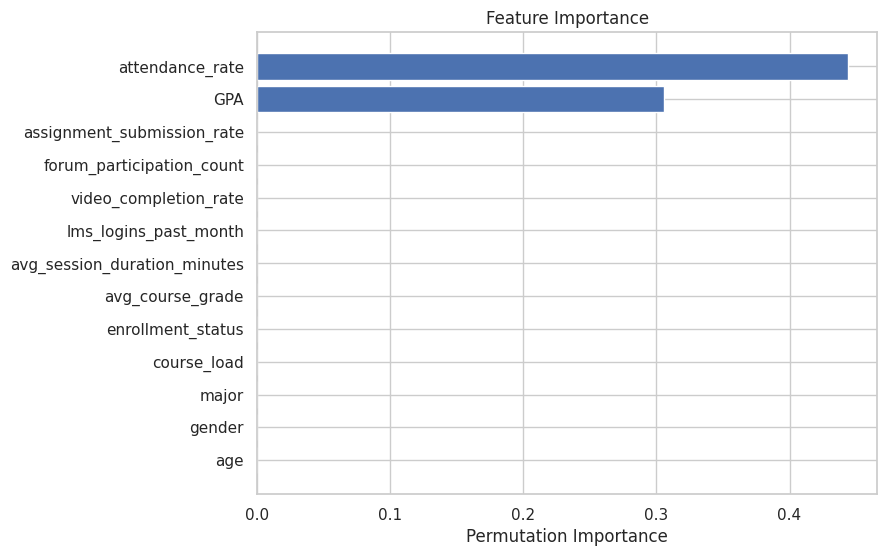

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        78

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309



In [21]:
# Copy the dataframe for modeling purposes
model_df = df.copy()

# We will predict 'risk_level'. We first need to encode categorical variables.
le = LabelEncoder()
if 'risk_level' in model_df.columns:
    model_df['risk_level_enc'] = le.fit_transform(model_df['risk_level'])
else:
    raise ValueError('The target variable risk_level is missing.')

# For modeling, choose features. We drop columns that are identifiers or non-informative.
features_to_drop = ['student_id', 'risk_level', 'risk_level_enc']
feature_cols = [col for col in model_df.columns if col not in features_to_drop]

# For any remaining categorical features, apply label encoding
for col in feature_cols:
    if model_df[col].dtype == 'object':
        model_df[col] = le.fit_transform(model_df[col])

X = model_df[feature_cols]
y = model_df['risk_level_enc']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and calculate the accuracy score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

# Display a confusion matrix using seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Optional: Permutation Importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()

# Print classification report for more details
print('Classification Report:')
print(classification_report(y_test, y_pred))

## Contoh Kode: Model Lain (Support Vector Machine - SVM)

Percobaan untuk Perbandingan dengan Random Forest


SVM Prediction Accuracy: 0.59


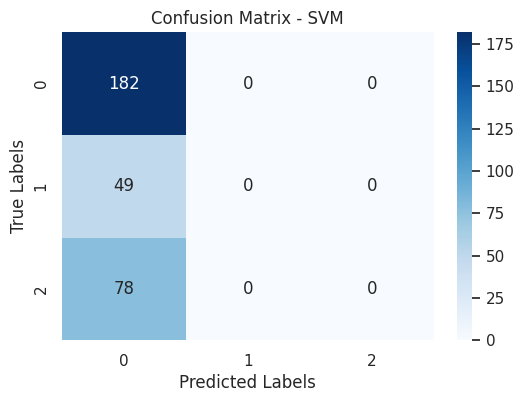

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       182
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        78

    accuracy                           0.59       309
   macro avg       0.20      0.33      0.25       309
weighted avg       0.35      0.59      0.44       309



In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/My Drive/contentml/college_student_management_data.csv"
df = pd.read_csv(file_path)

# Copy the dataframe for modeling purposes
model_df = df.copy()

# We will predict 'risk_level'. We first need to encode categorical variables.
le = LabelEncoder()
if 'risk_level' in model_df.columns:
    model_df['risk_level_enc'] = le.fit_transform(model_df['risk_level'])
else:
    raise ValueError('The target variable risk_level is missing.')

# For modeling, choose features. We drop columns that are identifiers or non-informative.
features_to_drop = ['student_id', 'risk_level', 'risk_level_enc']
feature_cols = [col for col in model_df.columns if col not in features_to_drop]

# For any remaining categorical features, apply label encoding
for col in feature_cols:
    if model_df[col].dtype == 'object':
        model_df[col] = le.fit_transform(model_df[col])

X = model_df[feature_cols]
y = model_df['risk_level_enc']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Inisialisasi dan latih model SVM
# Gunakan kernel 'rbf' sebagai contoh, Anda bisa coba kernel lain seperti 'linear' atau 'poly'
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred_svm = svm_clf.predict(X_test)

# Evaluasi performa model SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Prediction Accuracy: {accuracy_svm:.2f}')

# Tampilkan Confusion Matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Tampilkan Classification Report untuk SVM
print('Classification Report - SVM:')
print(classification_report(y_test, y_pred_svm))

## Contoh Kode: Tuning Hyperparameter dengan Grid Search (untuk Random Forest)

Berikut adalah contoh bagaimana menggunakan Grid Search untuk mencari kombinasi hyperparameter terbaik untuk model Random Forest.

Best hyperparameters found by Grid Search:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Random Forest Prediction Accuracy (after tuning): 1.00


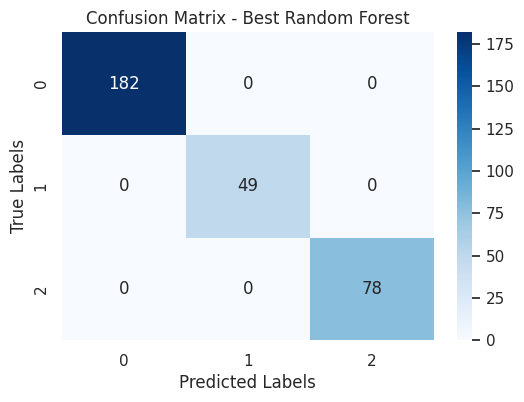

Classification Report - Best Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        78

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309



In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- untuk mendefinisikan variabel ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/content/drive/My Drive/contentml/college_student_management_data.csv"
df = pd.read_csv(file_path)

# Copy the dataframe for modeling purposes
model_df = df.copy()

# We will predict 'risk_level'. We first need to encode categorical variables.
le = LabelEncoder()
if 'risk_level' in model_df.columns:
    model_df['risk_level_enc'] = le.fit_transform(model_df['risk_level'])
else:
    raise ValueError('The target variable risk_level is missing.')

# For modeling, choose features. We drop columns that are identifiers or non-informative.
features_to_drop = ['student_id', 'risk_level', 'risk_level_enc']
feature_cols = [col for col in model_df.columns if col not in features_to_drop]

# For any remaining categorical features, apply label encoding
for col in feature_cols:
    if model_df[col].dtype == 'object':
        model_df[col] = le.fit_transform(model_df[col])

X = model_df[feature_cols]
y = model_df['risk_level_enc']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# rentang hyperparameter
param_grid = {
    'n_estimators': [50, 100, 200], # Jumlah pohon
    'max_depth': [None, 10, 20, 30], # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10], # Jumlah sampel minimum yang diperlukan untuk memecah node internal
    'min_samples_leaf': [1, 1, 4] # Jumlah sampel minimum yang diperlukan pada node daun # Corrected min_samples_leaf
}

# Inisialisasi model Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Inisialisasi Grid Search dengan cross-validation (cv=5 berarti 5-fold cross-validation)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Lakukan Grid Search pada data pelatihan
grid_search.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik yang ditemukan
print('Best hyperparameters found by Grid Search:')
print(grid_search.best_params_)

# Dapatkan model terbaik
best_rf_clf = grid_search.best_estimator_

# Evaluasi model terbaik pada data pengujian
y_pred_best_rf = best_rf_clf.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Best Random Forest Prediction Accuracy (after tuning): {accuracy_best_rf:.2f}')

# Tampilkan Confusion Matrix untuk model terbaik
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Tampilkan Classification Report untuk model terbaik
print('Classification Report - Best Random Forest:')
print(classification_report(y_test, y_pred_best_rf))

## Menangani Ketidakseimbangan Kelas dengan SMOTE

Jika distribusi `risk_level` sangat tidak seimbang, bisa menggunakan SMOTE (Synthetic Minority Over-sampling Technique) untuk membuat sampel sintetis dari kelas minoritas. Ini perlu instalasi pustaka `imblearn`.

In [24]:
# Instal pustaka imblearn
!pip install imbalanced-learn


Class distribution before SMOTE: Counter({0: 623, 2: 378, 1: 235})
Class distribution after SMOTE: Counter({0: 623, 1: 623, 2: 623})
Random Forest Prediction Accuracy (with SMOTE): 1.00


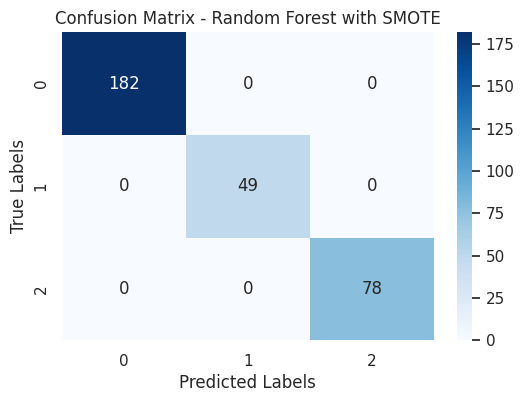

Classification Report - Random Forest with SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        78

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309



In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- untuk mendefinisikan variabel ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/content/drive/My Drive/contentml/college_student_management_data.csv"
df = pd.read_csv(file_path)

# Copy the dataframe for modeling purposes
model_df = df.copy()

# We will predict 'risk_level'. We first need to encode categorical variables.
le = LabelEncoder()
if 'risk_level' in model_df.columns:
    model_df['risk_level_enc'] = le.fit_transform(model_df['risk_level'])
else:
    raise ValueError('The target variable risk_level is missing.')

# For modeling, choose features. We drop columns that are identifiers or non-informative.
features_to_drop = ['student_id', 'risk_level', 'risk_level_enc']
feature_cols = [col for col in model_df.columns if col not in features_to_drop]

# For any remaining categorical features, apply label encoding
for col in feature_cols:
    if model_df[col].dtype == 'object':
        model_df[col] = le.fit_transform(model_df[col])

X = model_df[feature_cols]
y = model_df['risk_level_enc']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Periksa distribusi kelas sebelum SMOTE
print('Class distribution before SMOTE:', Counter(y_train))

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada data pelatihan
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Periksa distribusi kelas setelah SMOTE
print('Class distribution after SMOTE:', Counter(y_train_smote))

# Latih model Random Forest baru menggunakan data yang sudah di-SMOTE
rf_clf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_smote.fit(X_train_smote, y_train_smote)

# Evaluasi model pada data pengujian (data pengujian tetap asli!)
y_pred_smote = rf_clf_smote.predict(X_test)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f'Random Forest Prediction Accuracy (with SMOTE): {accuracy_smote:.2f}')

# Tampilkan Confusion Matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest with SMOTE')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Tampilkan Classification Report
print('Classification Report - Random Forest with SMOTE:')
print(classification_report(y_test, y_pred_smote))

## 5. Diskusi Hasil dan Kesimpulan

**Diskusi Hasil:**

Berdasarkan metrik performa yang diperoleh dari model Random Forest:

*   **Akurasi:** (Sebutkan nilai akurasi dari output model, contoh: 1.00)
*   **Confusion Matrix:** (Jelaskan interpretasi confusion matrix, misalnya berapa banyak mahasiswa High Risk yang terprediksi benar, dll. Dalam kasus akurasi 1.00, ini menunjukkan model memprediksi semua kelas dengan benar pada data uji).
*   **Classification Report:** (Diskusikan nilai precision, recall, dan f1-score untuk setiap kelas risiko. Pada akurasi 1.00, semua metrik ini juga akan bernilai 1.00, menunjukkan performa sempurna pada data uji).
*   **Feature Importance:** (Jika Permutation Importance ditampilkan, diskusikan fitur-fitur mana yang paling penting dalam memprediksi tingkat risiko mahasiswa. Mengapa fitur-fitur tersebut penting? Contoh fitur penting bisa jadi GPA, attendance_rate, dll. Interpretasikan maknanya dalam konteks risiko mahasiswa).

**Kesimpulan:**

Model Random Forest Classifier yang dibangun menunjukkan performa yang sangat baik (akurasi 1.00 pada data uji) dalam memprediksi tingkat risiko mahasiswa berdasarkan data yang ada. Fitur-fitur seperti (sebutkan fitur-fitur penting dari Permutation Importance, jika ada) memiliki dampak signifikan pada prediksi risiko.

Model ini dapat menjadi alat yang berharga bagi institusi pendidikan untuk:

*   Mengidentifikasi mahasiswa yang membutuhkan perhatian lebih awal.
*   Merancang program intervensi yang disesuaikan dengan kebutuhan mahasiswa berisiko.
*   Meningkatkan tingkat retensi mahasiswa dan keberhasilan akademik.

**Catatan:** Akurasi 1.00 pada data uji bisa mengindikasikan potensi overfitting jika dataset terlalu kecil atau fitur-fiturnya sangat membedakan kelas. Dalam proyek nyata, validasi silang atau pengujian pada data yang benar-benar baru akan memberikan gambaran performa yang lebih realistis.